# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from datetime import datetime
import seaborn as sns

In [13]:
# create three lists to store the data from the table
# and then create a dataframe from the three lists

ID = [1,2,3,4,5,6,7,8,9,10]
age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'ID': ID,'Age': age, 'Tardies': tardies})

Draw a dispersion diagram (scatter plot) for the data.

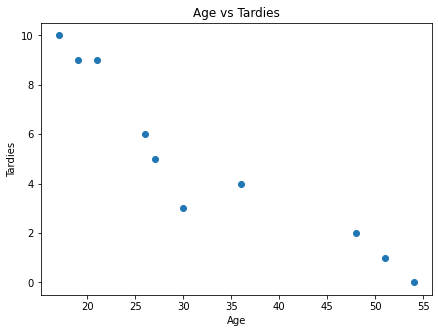

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [15]:
# Yes, there is a trend. Higher ages tend to have lower number of tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
student_data.head()

,ID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


In [17]:
#correlation:
# the two columns are negatively correlated
student_data[['Age', 'Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [18]:
#covariance:
# there is inverce covariance between the columns
student_data[['Age', 'Tardies']].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here.
from sklearn import linear_model

In [28]:
model = linear_model.LinearRegression()

In [32]:
x = student_data[['Age']]
y = student_data['Tardies']

In [33]:
result = model.fit(x,y)

In [38]:
display(result.intercept_)
display(result.coef_) 

12.888803363135771

array([-0.24282077])

Plot your regression model on your scatter plot.

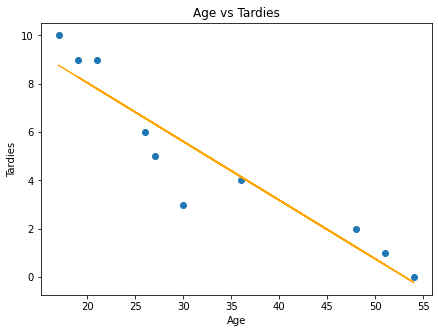

In [42]:
# Your code here.
plt.figure(figsize=(7, 5)) #adjusting the size
regression_line = result.intercept_ + result.coef_[0]*x #adding the regression line
plt.plot(x, regression_line, c = 'orange') # changing the color of the line

plt.scatter(x, y)
plt.title('Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# We can see a clear trend/correlation between age and tardies. Older people get less tardies.
# Knowing only the age of person we could predict the number of tardies


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [91]:
# Import any libraries you may need & the data
data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [94]:
# picking relevant columns and saving them in new dataframe
data_variables = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
data_variables.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [93]:
 # We will use linear regression

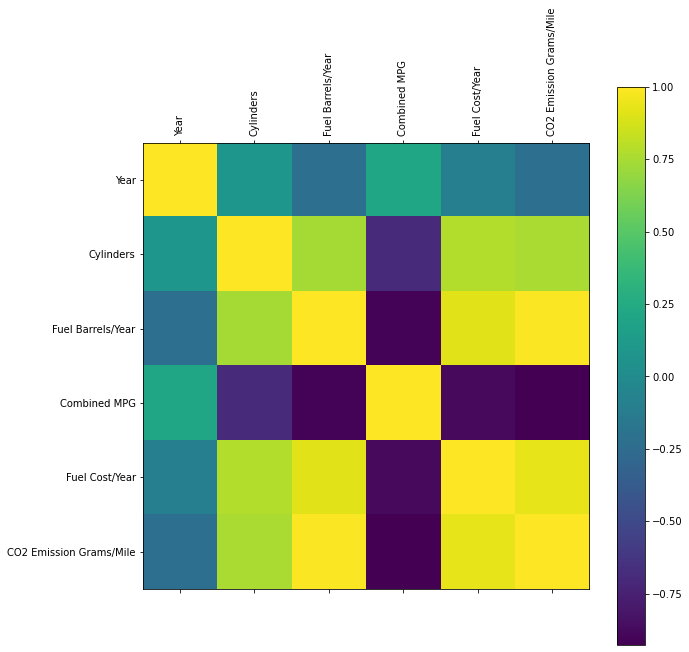

In [90]:
# descided to create correlation matrix and check all columns
# it appers that we could exclude combined MPG and Year since these are the least correlated to CO2 Emissions
# all other columns are correlated to the CO2 Emission column
# If we had to pick only one column I would pick Fuel Barrels/Year as prediction for single linearRegression

figure = plt.figure(figsize=(10,10)) #adjusting the size
test = plt.matshow(data_variables.corr(), fignum=1,)
plt.xticks(range(0,6),data_variables.columns)
plt.yticks(range(0,6),data_variables.columns)
figure.colorbar(test) #adding colorbar
plt.xticks(rotation=90) #rotating the x axis labels
plt.show()

In [125]:
# I wanted to try multiple linear regression
# the following code tries to create multiple LinearRegression

In [129]:
x = data_variables.drop(['CO2 Emission Grams/Mile'], axis=1).values # take everything and drop CO2
y = data_variables['CO2 Emission Grams/Mile'].values

In [133]:
# split the dataset in trainigng set and test set
from sklearn.model_selection import train_test_split # we need to import additional libraries

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3, random_state=0)

In [134]:
# train the model on the training set
model = linear_model.LinearRegression()

In [136]:
model.fit(x_train,y_train)

LinearRegression()

In [137]:
# testing the prediction capabilities of the model
y_pred = model.predict(x_test)
print(y_pred)

[369.69793879 499.35919483 454.11368591 ... 506.46118899 413.29338498
 554.19065648]


In [138]:
# took the first row of the table and ran predict function to see if the model is accurate
model.predict([[1984, 4.0, 19.388824, 17, 1950]])

array([522.01662174])

In [140]:
#evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) # 98% is very accurate score, so we are happy with the result

0.9831309864552183

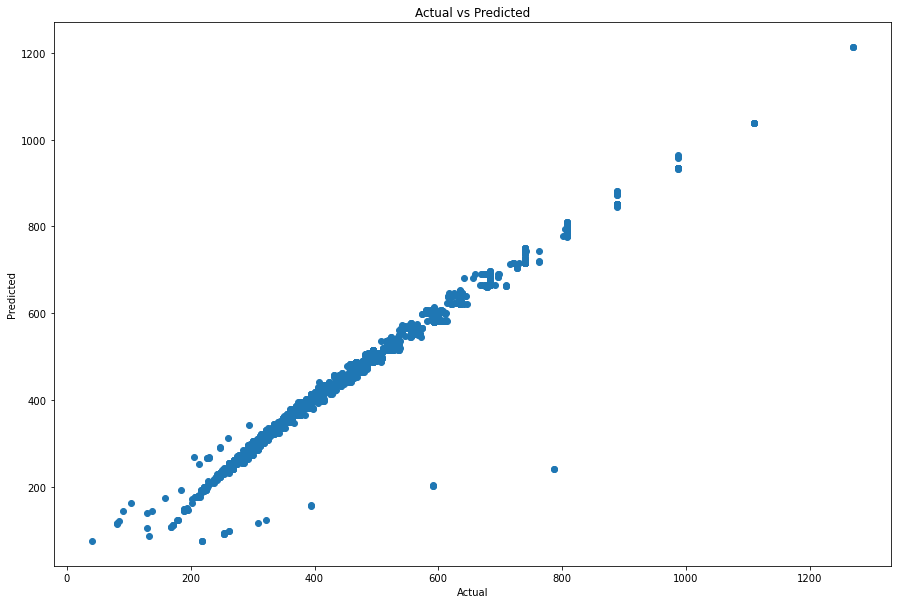

In [142]:
# values are pretty close to each other
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
data_variables

In [144]:
# checking the difference between predicted values and actual values to see the accuracy of the model
pred_y_df = pd.DataFrame({'Actial Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})

In [145]:
pred_y_df[0:20]

,Actial Value,Predicted Value,Difference
0,370.291667,369.697939,0.593728
1,493.722222,499.359195,-5.636973
2,444.350000,454.113686,-9.763686
3,423.190476,423.430212,-0.239736
4,444.350000,440.632062,3.717938
5,522.764706,525.688844,-2.924138
6,355.480000,359.886758,-4.406758
7,522.764706,536.156998,-13.392293
8,261.382353,249.242183,12.140170
9,423.190476,429.452395,-6.261919


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# I did not follow the questions of the task, but managed to create Multiple Linear Regression
# The training of the model was sucessful and it is relatively accurate
# After that I did some checks if the model works as intended


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [147]:
# Your code here.
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]
party_data = pd.DataFrame({'X': X,'Y': Y})
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

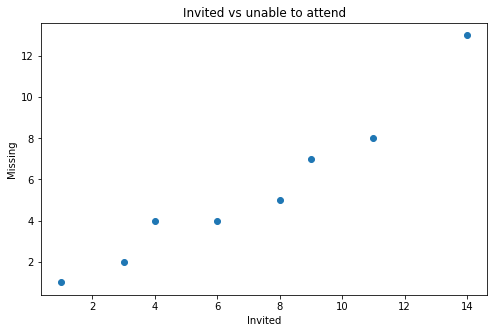

In [161]:
# Your code here.
plt.figure(figsize=(8,5))
plt.scatter(party_data['X'], party_data['Y'])
plt.xlabel('Invited')
plt.ylabel('Missing')
plt.title('Invited vs unable to attend')
plt.show()

In [152]:
model = linear_model.LinearRegression()

In [153]:
x = party_data[['X']]
y = party_data['Y']

In [154]:
result = model.fit(x,y)

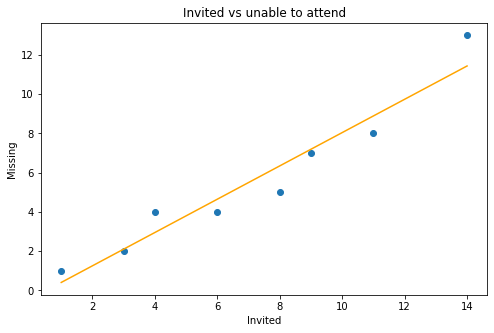

In [160]:
plt.figure(figsize=(8,5)) # adjusting the size

regression_line = result.intercept_ + result.coef_[0]*x #adding the regression line
plt.plot(x, regression_line, c = 'orange') # changing the color of the line

plt.scatter(party_data['X'], party_data['Y'])
plt.xlabel('Invited')
plt.ylabel('Missing')
plt.title('Invited vs unable to attend')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [162]:
# there is clear relationship between number of invitations and people unable to attend
display(result.intercept_)
display(result.coef_)

-0.43939393939393767

array([0.84848485])

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [163]:
# removoving the last value from the dataframe since it was the only outlier I found
X = [1, 3, 4, 6, 8, 9, 11]
Y = [1, 2, 4, 4, 5, 7, 8]
party_data = pd.DataFrame({'X': X,'Y': Y})
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [164]:
model = linear_model.LinearRegression()
x = party_data[['X']]
y = party_data['Y']
result = model.fit(x,y)

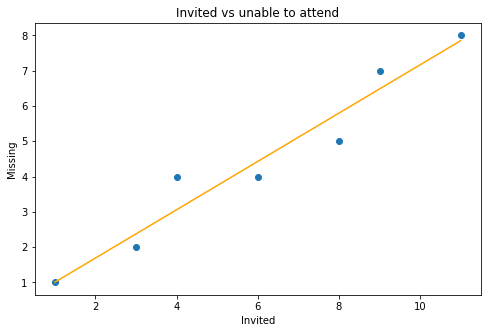

In [165]:
plt.figure(figsize=(8,5)) # adjusting the size

regression_line = result.intercept_ + result.coef_[0]*x #adding the regression line
plt.plot(x, regression_line, c = 'orange') # changing the color of the line

plt.scatter(party_data['X'], party_data['Y'])
plt.xlabel('Invited')
plt.ylabel('Missing')
plt.title('Invited vs unable to attend')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [166]:
# both values changed
display(result.intercept_)
display(result.coef_)

0.32330827067669166

array([0.68421053])

In [ ]:
# I would say that the second model looks to be more accurate 